# Perceptions&Interactions TP2 - Traitement d'image

## Introduction

*Imports*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**(Rappel) Chargement d'une image avec OpenCV et affichage avec Matplotlib**

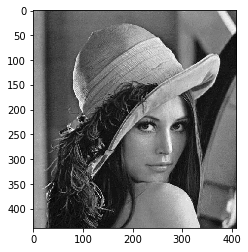

In [3]:
img = cv2.imread("lena_gray.png")
plt.imshow(img)
plt.show()

**Format des données d'une image**

Une image est constituée de 3 dimensions, qui sont ici respectivement la hauteur, la longueur et les trois canaux de couleur (Rouge, Vert, Bleu).

Utiliser ".shape" sur une image permet d'obtenir un tuple contenant la taille de l'image dans chacune des dimensions de celle-ci.

In [4]:
print("Taille de l'image :", img.shape)

(h, w, c) = img.shape
print("Hauteur :", h)
print("Largeur :", w)
print("Nombre de canaux de couleur :", c)
# ou
print("Hauteur (v2) :", img.shape[0])
print("Largeur (v2) :", img.shape[1])
print("Nombre de canaux de couleur (v2) :", img.shape[2])

Taille de l'image : (439, 410, 3)
Hauteur : 439
Largeur : 410
Nombre de canaux de couleur : 3
Hauteur (v2) : 439
Largeur (v2) : 410
Nombre de canaux de couleur (v2) : 3


**Obtenir la valeur maximale d'une image**

In [5]:
def max_value_image(img):
    val_max = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if img[i, j, k] > val_max:
                    val_max = img[i, j, k]
    return val_max

print("Intensité maximale de l'image :", max_value_image(img))

Intensité maximale de l'image : 243


ou

In [6]:
print("Valeur maximale de l'image (numpy) :", np.max(img))

Valeur maximale de l'image (numpy) : 243


**Obtenir la valeur moyenne d'une image**

In [7]:
def mean_value_image_v1(img):
    val_sum = 0
    nb_values = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                val_sum += img[i, j, k]
                nb_values += 1
    return val_sum / nb_values

print("Intensité moyenne de l'image (v1) :", mean_value_image_v1(img))

Intensité moyenne de l'image (v1) : 100.18915495305295


ou

In [8]:
delta_new = val_max - val_mindef mean_value_image_v2(img):
    val_sum = np.sum(img)
    nb_values = img.shape[0] * img.shape[1] * img.shape[2]
    return val_sum / nb_values

print("Intensité moyenne de l'image (v2) :", mean_value_image_v2(img))

SyntaxError: invalid syntax (<ipython-input-8-14c44e8fa092>, line 1)

ou

In [9]:
print("Intensité moyenne de l'image (numpy) :", np.mean(img))

Intensité moyenne de l'image (numpy) : 100.18915495305295


**Autres fonctions numpy utiles**

***np.zeros((k1, k2, k3, ..., kN))*** permet de créer un tableau à N dimensions de tailles k1, k2, k3, ..., kN rempli entièrement de 0s. Il est également possible de lui donner comme paramètre la *shape* d'un autre tableau pour copier ses dimensions.

*np.ones((k1, k2, k3, ..., kN))* fait de même, mais avec des 1 à la place des 0.

*np.arange(k)* permet de créer un tableau \[0, 1, 2, ..., k-1, k\]. De la même manière, *np.arange(a, b)* permet de créer un tableau \[a, a+1, a+2, ..., b-1, b\].

In [10]:
example = np.zeros((10))
print("Exemple 1 :", example)
print("Shape exemple 1 :", example.shape)
example = np.zeros((2, 2, 3))
for exp in example:
    print(exp)
print("Shape exemple 2 :", example.shape)
example = np.zeros(img.shape)
print("Shape exemple 3 :", example.shape)
example = np.ones((10))
print("Exemple 4 :", example)
print("Shape exemple 4 :", example.shape)

print()

example = np.arange(3, 10)
print("Exemple 5 :", example)

Exemple 1 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape exemple 1 : (10,)
[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]
Shape exemple 2 : (2, 2, 3)
Shape exemple 3 : (439, 410, 3)
Exemple 4 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape exemple 4 : (10,)

Exemple 5 : [3 4 5 6 7 8 9]


## À vous

### **1. Histogramme d'intensité**

Codez la fonction histogram qui calcule l'histogramme d'intensité d'une image en niveaux de gris et affichez-le. L'histogramme d'intensité d'une image peut être vu comme un tableau à une dimension dont chaque case contient le nombre de pixels à une certaine valeur d'intensité.

Après avoir codé la fonction, décommentez la dernière ligne pour afficher l'histogramme sous forme de barres. Vous pouvez trouver un exemple de résultat attendu dans results/histogram.png.

<BarContainer object of 256 artists>

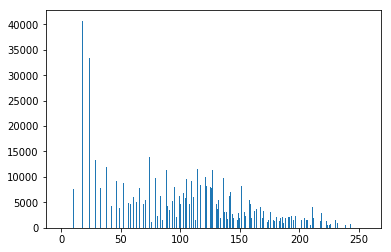

In [11]:
def histogram(img):
    Image_Height = img.shape[0]
    Image_Width = img.shape[1]
    Image_color = img.shape[2]
    Historgram = np.zeros([256], np.int32)
    for x in range(0, Image_Height):
        for y in range(0, Image_Width):
            for z in range (0, Image_color):
                Historgram[img[x,y,z]] = Historgram[img[x,y,z]] + 1
    return Historgram

hist = histogram(img)
plt.bar(np.arange(len(hist)), hist)

### **2. Normalisation**

Codez la fonction normalize. Cette fonction a pour effet de réduire ou d'augmenter le contraste, respectivement en comprimant ou en étirant les valeurs d'intensité de l'image d'entrée vers les valeurs val_min et val_max. Faites attention aux types (uint8, float...), leur déclaration étant implicite en Python.

Affichez l'image après normalisation avec val_min = 100 et val_max = 125. Vous pouvez trouver un exemple de résultat attendu dans results/lena_normalized.png.

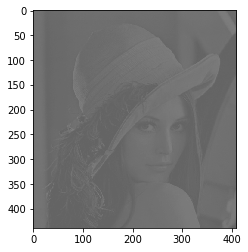

In [24]:
def normalize(img, val_min, val_max):
    Image_Height = img.shape[0]
    Image_Width = img.shape[1]
    Image_color = img.shape[2]
    Min = np.min(img)
    Max = np.max(img)
    Normalize = img.copy()
    for x in range(0, Image_Height):
        for y in range(0, Image_Width):
            for z in range (0, Image_color):
                delta_old = Max - Min
                delta_new = val_max - val_min
                val = img[x,y,z]
                val -= Min
                val /= delta_old
                val *= delta_new
                val += val_min
                Normalize[x,y,z] = val
    return Normalize

img_normalized = normalize(img, 100, 125)
plt.imshow(img_normalized)

#### **Relation entre histogramme et normalisation**

Affichez à nouveau l'histogramme, cette fois-ci sur l'image normalisée, et constatez les changements. Vous pouvez essayer de modifier les val_min et val_max de la fonction normalize puis d'afficher à nouveau l'histogramme. Qu'en concluez-vous ?

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


<BarContainer object of 256 artists>

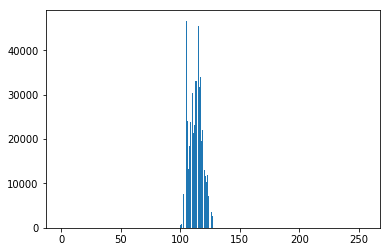

In [13]:
val_min = 100
val_max = 125

img_normalized = normalize(img, val_min, val_max)
hist = histogram(img_normalized)
plt.bar(np.arange(len(hist)), hist)

### **3. Débruitage et convolution**

Dû à un problème informatique, l'image de Lena s'est retrouvée recouverte de bruit.

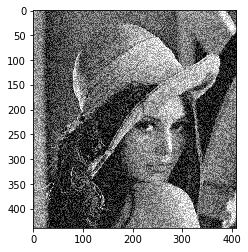

In [14]:
img_bruitee = cv2.imread("lena_bruitee.png")
plt.imshow(img_bruitee)
plt.show()

Le bruit affectant l'image étant du bruit blanc (aléatoire), il est possible de s'approcher de l'image originale en prenant pour chaque pixel la moyenne de lui-même et de chacun de ses voisins.

Écrivez une fonction moyenne_voisins qui crée une nouvelle image, dans laquelle chaque pixel est égal à la moyenne de son voisinnage de l'image originale. Affichez ensuite cette image. Vous pouvez trouver un exemple de résultat dans resultats/lena_debruitee.png.

Notes : Les bords des images seront ignorés. Cette fois encore, faites attention aux types (uint8, float...).

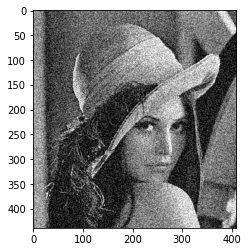

In [26]:
def moyenne_voisins(img):

img_debruitee = moyenne_voisins(img_bruitee)
plt.imshow(img_debruitee)

Observez le résultat. Qu'en concluez-vous sur l'opération effectuée ?